In [ ]:
## [0] - Airplanes
# [1] - Cars
# [2] - Birds
# [3] - cats
# [4] - Deer
# [5] - Dogs
# [6] - Frogs
# [7] - Horses
# [8] - Ships
# [9] - Trucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 67s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

[2]


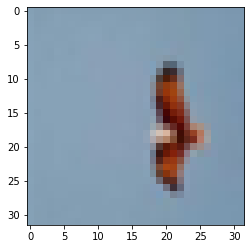

In [9]:
i =1009
plt.imshow(X_train[i])
print(y_train[i])

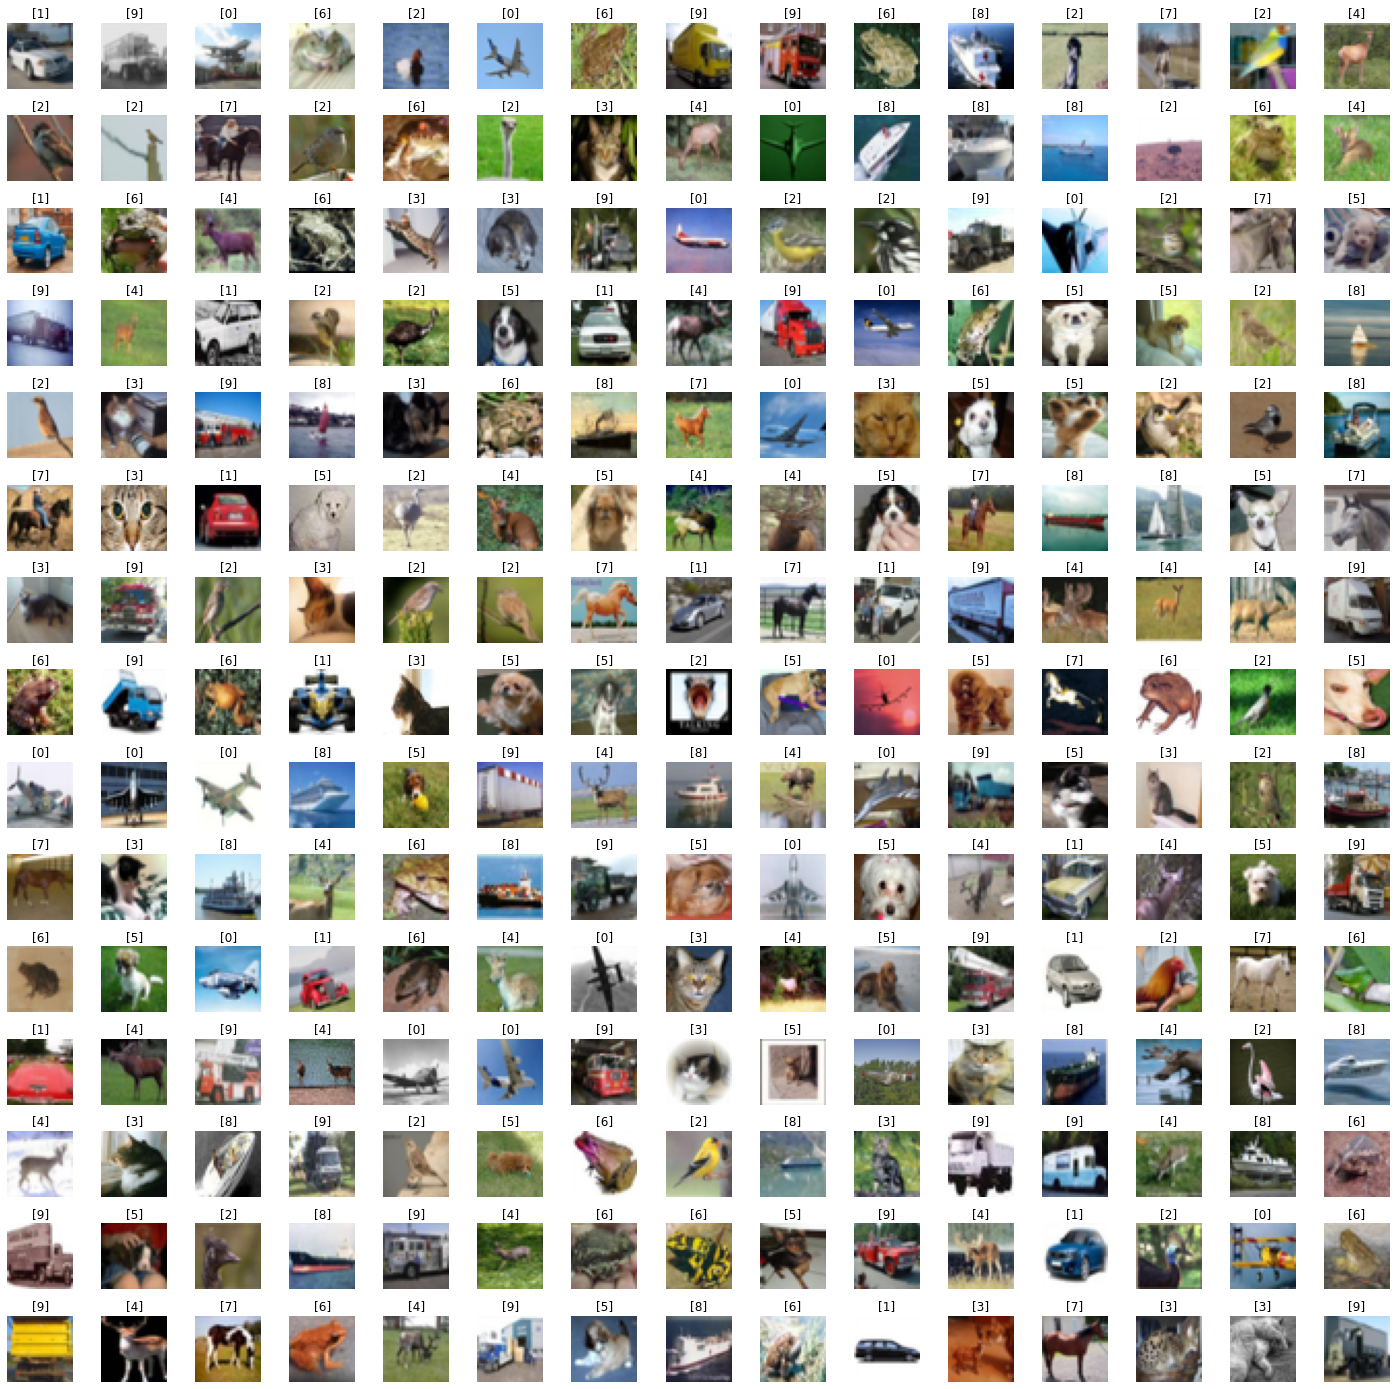

In [16]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid*W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].axis('off') # to remove axis plot
    axes[i].set_title(y_train[index]) # indexing each image
    
plt.subplots_adjust(hspace = 0.4) # for spacing

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
number_cat = 10

In [20]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [21]:
# convert into binary values
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [26]:
# normalize
X_train = X_train/255
X_test = X_test/255

In [27]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
Input_shape = X_train.shape[1:]

In [30]:
Input_shape # need shape

(32, 32, 3)

In [31]:
#Training the Model

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [35]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 512, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [39]:
from keras.optimizers import RMSprop

cnn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])


C:\Users\ashma\anaconda3\Anaconda\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [40]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 88s 55ms/step - loss: 1.5402 - accuracy: 0.4458
Epoch 2/2
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1380 - accuracy: 0.6060


In [41]:
# Evaluating the Model

In [46]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}' .format(evaluation[1]))

313/313 [==============================] - 4s 13ms/step - loss: 1.0262 - accuracy: 0.6394
Test Accuracy: 0.6394000053405762


In [51]:
predicted_classes = cnn_model.predict(X_test) # was giving the value in normalized form
predicted_classes = predicted_classes.argmax(axis=1) #to convert from normalize to real one
predicted_classes

313/313 [==============================] - 4s 14ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [52]:
y_test # is in normalize form 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [53]:
y_test = y_test.argmax(axis=1)

In [54]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

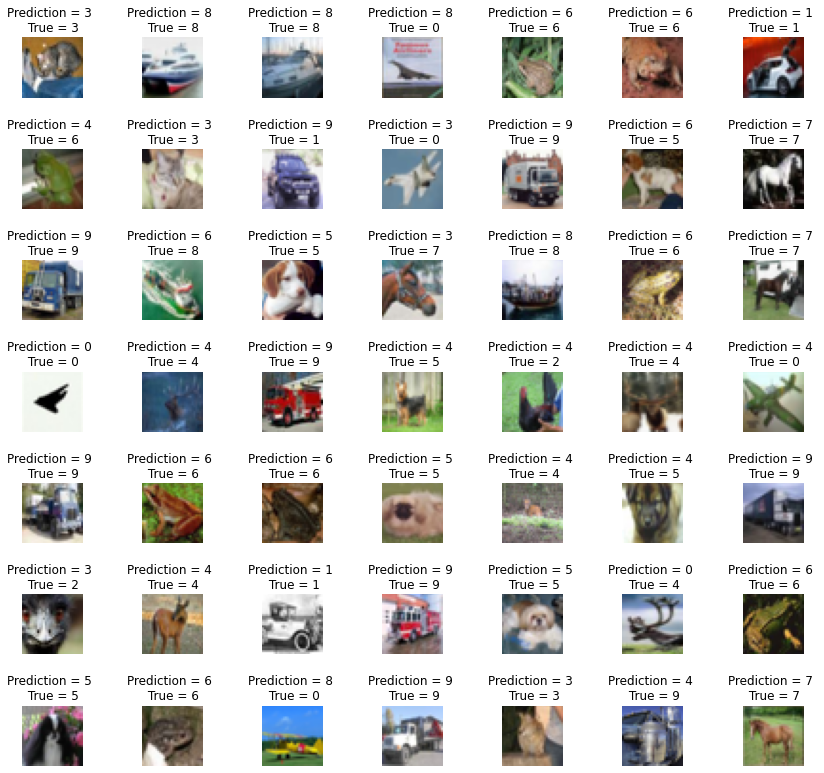

In [67]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (14, 14))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}' .format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [68]:
# Confusion Matrix

<AxesSubplot:>

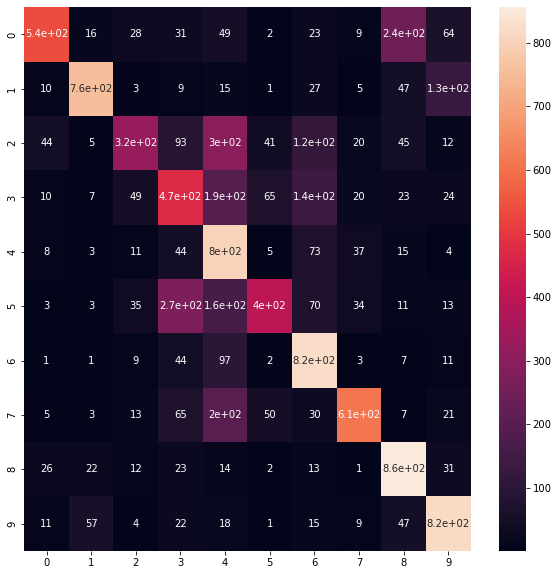

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
# using seaborn, confusion matrix will be displayed in better form

plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)